## Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Для предотвращения оттока клиентов нам поставлена задача — провести анализ и подготовить план действий по удержанию клиентов. А именно:

•	спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;

•	сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

•	проанализировать основные признаки, наиболее сильно влияющие на отток;

•	сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    
    - выделить целевые группы клиентов;
    - предложить меры по снижению оттока;
    - определить другие особенности взаимодействия с клиентами.
    
    Краткое описание данных:
-	'gender' — пол;
-	'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
-	'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
-	Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
-	'Phone' — наличие контактного телефона;
-	'Age' — возраст;
-	'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах);
-	'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
-	'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
-	'Group_visits' — факт посещения групповых занятий;
-	'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
-	'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
-	'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
-	'Churn' — факт оттока в текущем месяце.



## Загрузка и изучение данных 

In [1]:
#загрузим все библиотеки
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import itertools
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#прочитаем из данные csv-файла 
df = pd.read_csv('/datasets/gym_churn.csv')
#распечатаем размер файла и первые 5 строк
print(df.shape)
display(df.head(5))


(4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Всего в нашем датафрейме 4000 наблюдений и 14 полей - 13 признаков и целевая переменная (столбец "Churn" - факт оттока в текущем месяце) 

## Исследовательский анализ данных (EDA)

Посмотрим на сводную информацию о датафрейме методом info(). Оценим:
•	есть ли среди полей категориальные?
•	есть ли пропуски в каких-нибудь признаках?


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
# посчитаем количество явных дубликатов
df.duplicated().sum()

0

Дубликатов не обнаружено

Видим, что пропусков нет, категоральных полей тоже нет. теперь изучим средние значения и стандартные отклонения методом describe()

In [5]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Видим, что такие признаки, как пол (gender), близость к фитнес-центру (Near_Location), сотрудник компании-партнера (Partner), использование промо-кода от знакомого (Promo_friends), наличие контактного телефона (Phone), факт посещения групповых занятий (Group_visits) имеют всего по два значения 0 и 1 (муж/жен, да/нет). Признак "возраст" (Age): средний возраст посетителей 29 лет, самому младшему посетителю 18 лет, самому возрастному 41. Срок до окончания текущего абонемента (Month_to_end_contract): среднее значение 4 месяца, минимальное 1, максимальное 12 месяцев. Время с момента первого обращения в фитнес-центр (Lifetime):среднее значение около 4 месяцев, минимальное 0, максимальное 31 месяц. Средняя частота посещений центра (Avg_class_frequency_total и 	Avg_class_frequency_current_month): среднее значение около 2 раз в неделю, минимальное ноль, максимум 6 раз в неделю. На первый взгляд все логично, явных выбросов не наблюдается. 


Остановимся поподробнее на бинарных признаках:пол (gender), близость к фитнес-центру (Near_Location), сотрудник компании-партнера (Partner), использование промо-кода от знакомого (Promo_friends), наличие контактного телефона (Phone), факт посещения групповых занятий (Group_visits). Посмотрим на долю клиентов по каждому признаку.

In [6]:
print(df['gender'].value_counts())
print(df['Near_Location'].value_counts())
print(df['Partner'].value_counts())
print(df['Group_visits'].value_counts())
print(df['Promo_friends'].value_counts())


1    2041
0    1959
Name: gender, dtype: int64
1    3381
0     619
Name: Near_Location, dtype: int64
0    2053
1    1947
Name: Partner, dtype: int64
0    2351
1    1649
Name: Group_visits, dtype: int64
0    2766
1    1234
Name: Promo_friends, dtype: int64


Таким образом, мужчин и женщин практически поровну, большинство клиентов (более 80%) живут рядом с фитнес-центром, работников предприятий-партнеров и не относящихся к таковым практически равное количество. Большинство клиентов посещают групповые занятия (почти 60%). Около 70% клиентов использовали промо-код от знакомого при оплате первого абонемента.

Теперь посмотрим на средние значения признаков по отдельности в двух группах: 1. тех, кто ушел в отток, 2. тех, кто остался. Применим метод groupby().

In [7]:
df.groupby(by='Churn').mean().T

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


Получается, что среди ушедших клиентов (Churn=1) и среди оставшихся (Churn=0) одинаково как женщин так и мужчин, также практически у всех клиентов есть телефоны. И те и другие, как правило, живут недалеко от фитнес-центра. Сотрудников компаний-партнеров, клиентов, пришедших по акции "приведи друга", клиентов, посещающих групповые занятия, больше среди оставшихся клиентов. Средний возраст ушедших клиентов около 27 лет, оставшихся - около 30. Вполне логично, что длительность абонемента у оставшихся клиентов составляет около 6 месяцев, у ушедших - около двух. Оставшиеся клиенты чаще, чем ушедшие, пользуются дополнительными услугами фитнес-центра (признак Avg_additional_charges_total). Довольно отличается время с момента первого посещения центра: более 5 месяцев у оставшихся клиентов и неполные 2 месяца - у ушедших.  "Преданные" клиенты посещают фитнес не менее 2 раз в неделю, ушедшие - около одного. 
Для наглядности построим столбчатые гистограммы распределения признаков для ушедших и очтавшихся клиентов.

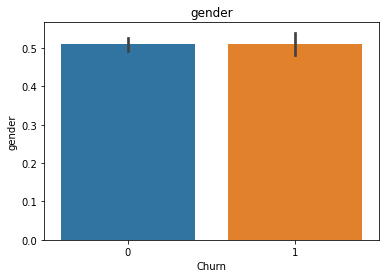

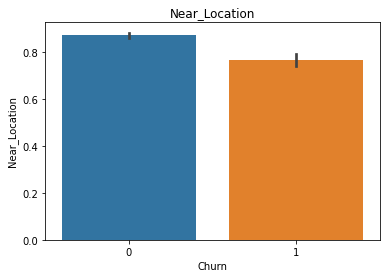

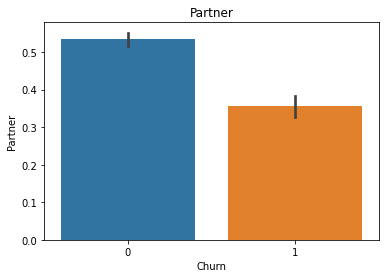

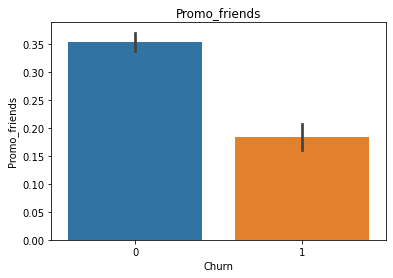

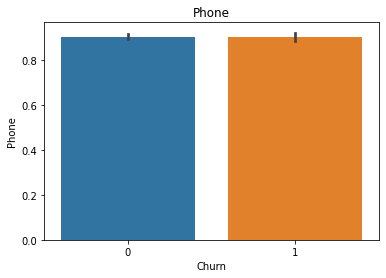

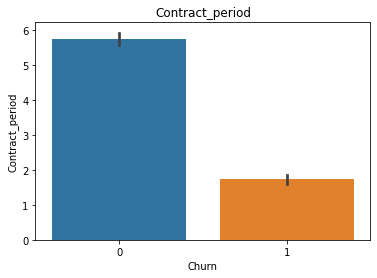

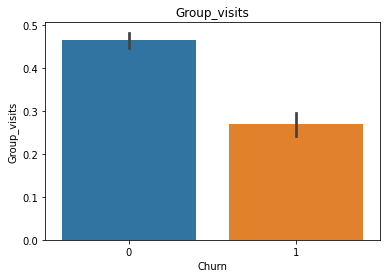

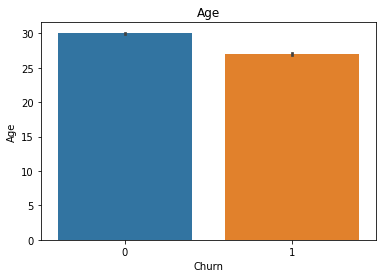

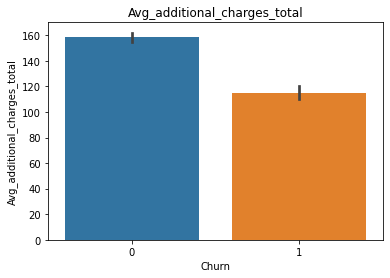

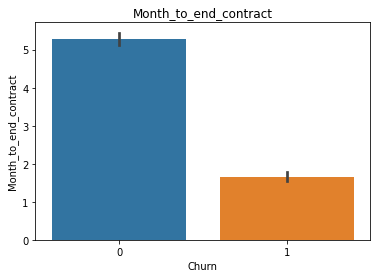

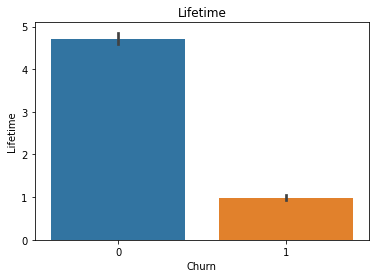

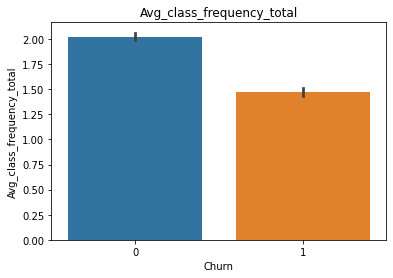

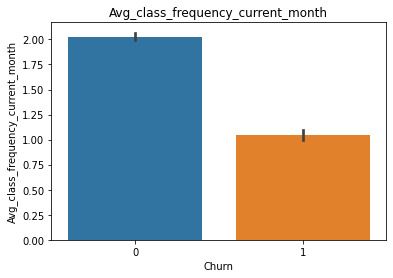

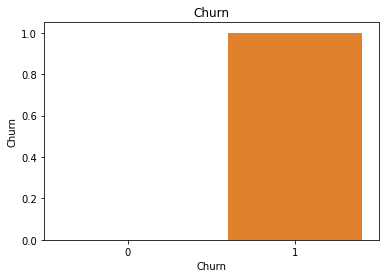

In [8]:
for col in df.columns:
    sns.barplot(data=df, x=df['Churn'], y=df[col])
    plt.title(col)
    plt.show()


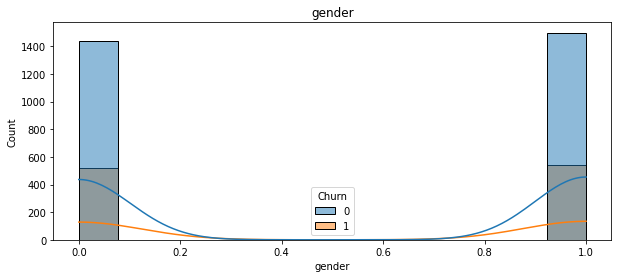

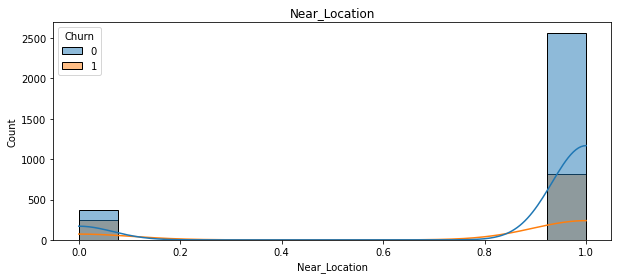

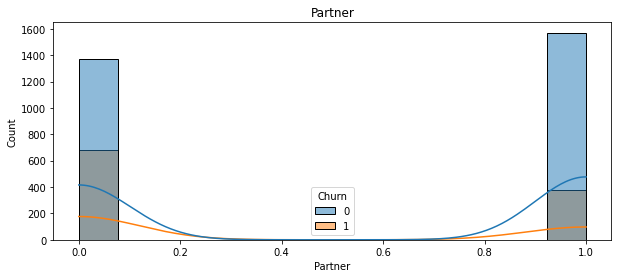

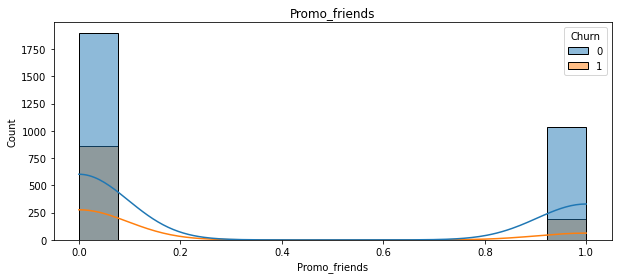

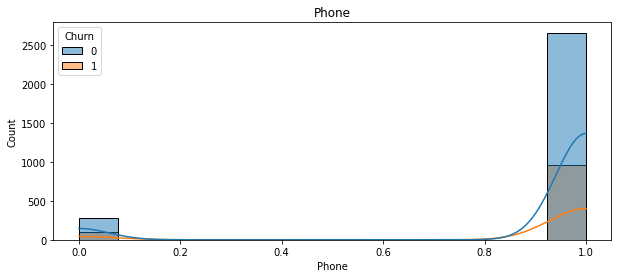

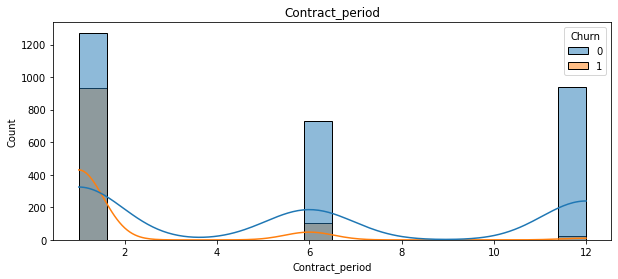

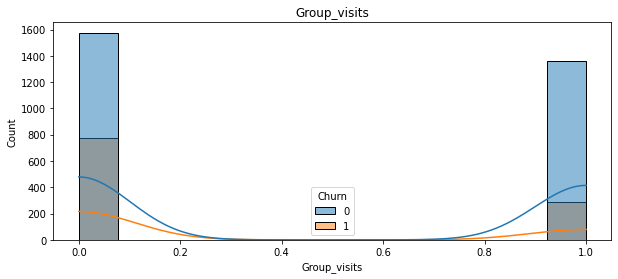

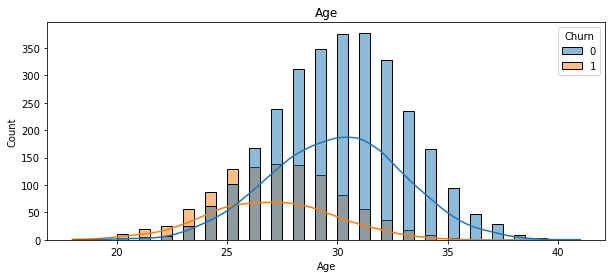

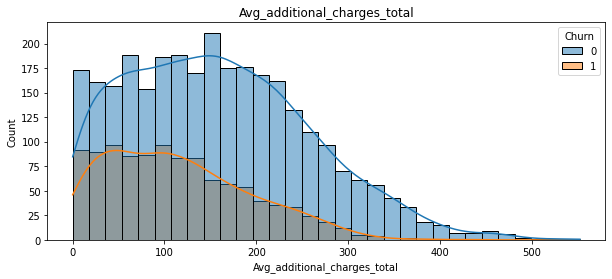

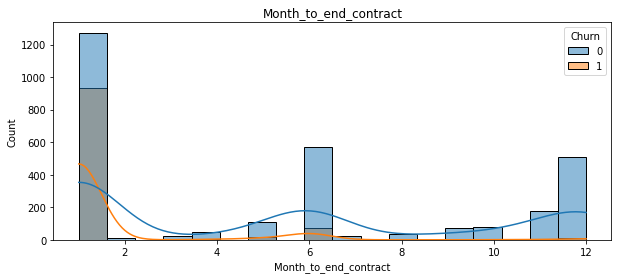

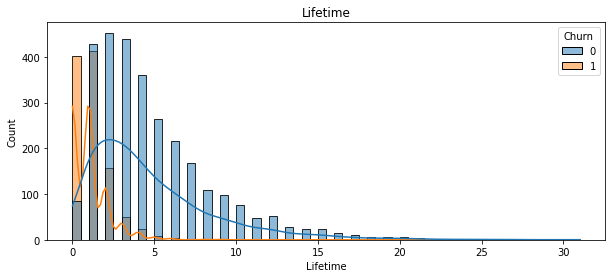

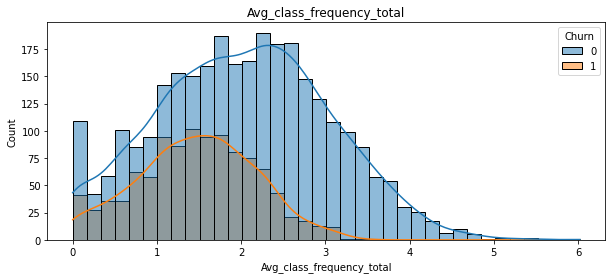

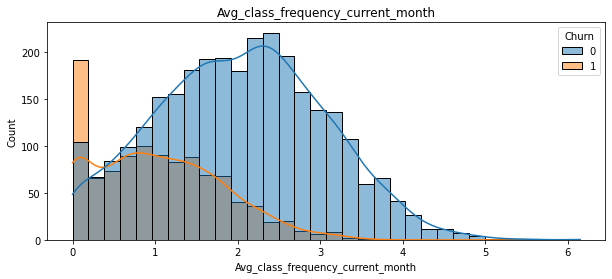

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


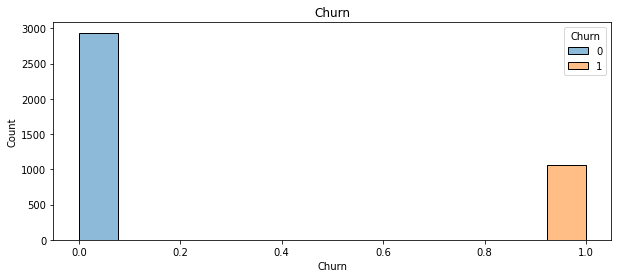

In [9]:
for col in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True)
    plt.title(col)
    plt.show()


Таким образом, гистограммы подтверждают вышеназванные выводы. Теперь построим матрицу корреляций

In [10]:
cm = df.corr() 
cm

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


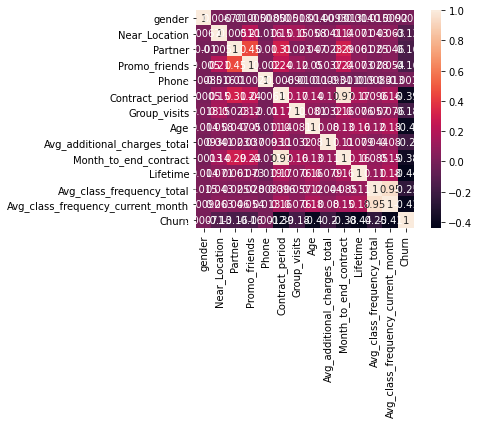

In [11]:
#отобразим матрицу корреляций
sns.heatmap(cm, annot=True, square=True)
sns.set(rc={'figure.figsize':(30,30)})
plt.show()

Таким образом, наибольшая обратная зависимость оттока клиентов наблюдается от: времени первого посещения центра, частоты посещения, возраста, длительности абонемента

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

In [12]:
#разделим наши данные на признаки (матрица x) и целевую переменную (y)
x = df.drop('Churn', axis = 1)
y = df['Churn']

#разделяем модель на обучающую и валидационную выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом.


In [13]:
# обучим модель способом логистической регресии
model_LR = LogisticRegression(random_state=0, max_iter=10000)
model_LR.fit(x_train, y_train)
predictions_LR = model_LR.predict(x_test)

# обучим модель способом случайного леса
model_RFR = RandomForestClassifier(random_state=0)
model_RFR.fit(x_train, y_train)
predictions_RFR = model_RFR.predict(x_test)


print('Метрики для логистической регресии')
print('Accuracy (доля правильных ответов): {:.2f}'.format(accuracy_score(y_test, predictions_LR)))
print('Precision (точность): {:.2f}'.format(precision_score(y_test, predictions_LR)))
print('Recall (полнота): {:.2f}'.format(recall_score(y_test, predictions_LR)))

print('Метрики для случайного леса')
print('Accuracy (доля правильных ответов): {:.2f}'.format(accuracy_score(y_test, predictions_RFR)))
print('Precision (точность): {:.2f}'.format(precision_score(y_test, predictions_RFR)))
print('Recall (полнота): {:.2f}'.format(recall_score(y_test, predictions_RFR)))

Метрики для логистической регресии
Accuracy (доля правильных ответов): 0.92
Precision (точность): 0.86
Recall (полнота): 0.83
Метрики для случайного леса
Accuracy (доля правильных ответов): 0.92
Precision (точность): 0.84
Recall (полнота): 0.82


Таким образом, по всем параметрам модель случайного леса показала более точные и полные результаты. Теперь по этой модели оценим важность признаков

In [14]:
# обучим финальную модель
final_model = RandomForestClassifier()
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)

# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
df1= pd.DataFrame()
importances = final_model.feature_importances_
print(x.columns)
df1['Признаки'] = x.columns
df1['Важность'] = importances
print(df1.sort_values(by= 'Важность', ascending=False))


Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month'],
      dtype='object')
                             Признаки  Важность
10                           Lifetime  0.289498
12  Avg_class_frequency_current_month  0.177541
11          Avg_class_frequency_total  0.132014
7                                 Age  0.114583
8        Avg_additional_charges_total  0.087673
9               Month_to_end_contract  0.079317
5                     Contract_period  0.053306
6                        Group_visits  0.016155
3                       Promo_friends  0.011536
2                             Partner  0.011534
0                              gender  0.010993
1                       Near_Location  0.009787
4                               Phone  0.006062


Таким образом, наиболее важными признаками оказались:  Lifetime (время с момента первого обращения в центр), Avg_class_frequency_current_month (частота посещений в неделю), Avg_class_frequency_total (частота посещений в неделю за предыдущий месяц), Age (Возраст), Avg_additional_charges_total (выручка от других услуг фитнес-центра), Month_to_end_contract(срок до окончания абонемента) и  Contract_period(длительность действующего абонемента).   

## Кластеризация клиентов

### Стандартизация, матрица расстояний , дендрограмма

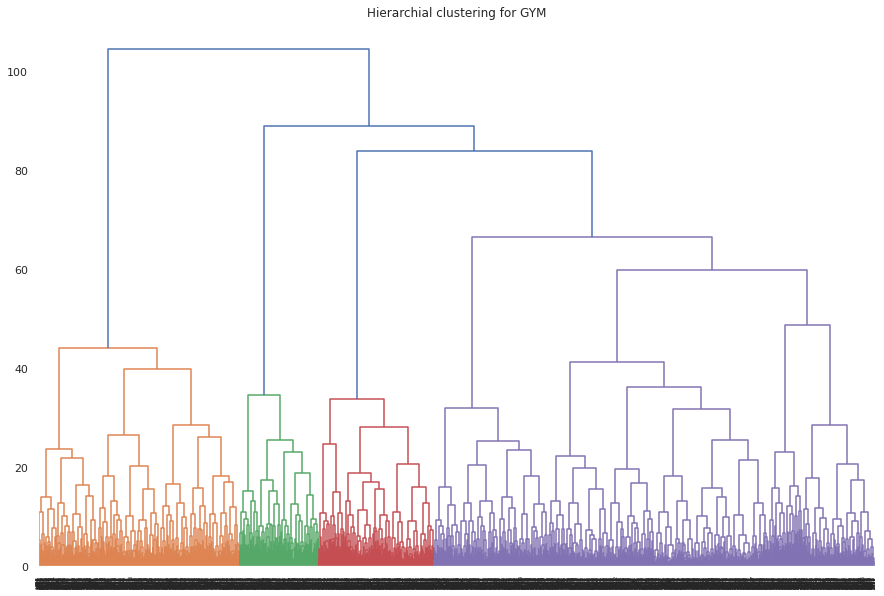

In [15]:
# стандартизируем данные
df_k = df.drop(columns=['Churn'], axis=1)
sc = StandardScaler()
x_sc = sc.fit_transform(df_k)
# построим матрицу расстояний и нарисуем дендрограмму
linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 


Видим, что оптимальное число кластеров 4 — четыре разных цвета на графике. Далее будем рассматривать 5 кластеров, как того требует задание

### Обучение модели кластеризации на основе алгоритма K-Means

In [16]:
# задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=5, random_state=0)
# применяем алгоритм к данным и формируем вектор кластеров 
labels = km.fit_predict(x_sc) 
# сохраним метки кластера в поле нашего датасета
df['cluster'] = labels
# посмотрим на средние значения признаков для кластеров
df.groupby(['cluster']).mean().T

cluster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
Near_Location,0.959406,0.862338,0.000000,1.000000,0.976134
Partner,0.783168,0.470130,0.463366,0.350238,0.356802
Promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
Phone,1.000000,0.000000,1.000000,1.000000,0.998807
Contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
Group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
Age,29.982178,29.301299,28.477228,28.167987,30.125298
Avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
Month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


Изучив средние значения признаков по кластерам, можно заметить:
1. В первый кластер вошли клиенты со средней длительностью текущего абонемента почти 11 месяцев. Т.е. это те, кто покупали годовые абонементы.
2. Во второй кластер вошли клиенты, которые не стали оставлять свой номер телефона.
3. Третий кластер формируют клиенты, дальше всех живущие от фитнес-центра.
4. В четвертую группу входят клиенты, реже других песещающих центр
5. В пятый кластер, видимо, входят клиенты, которые около трех раз в неделю посещают фитнес-центр.

### Распределение признаков по кластерам

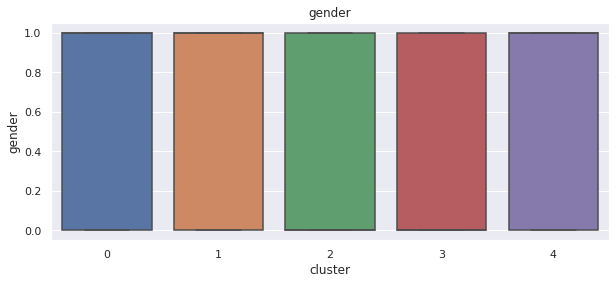

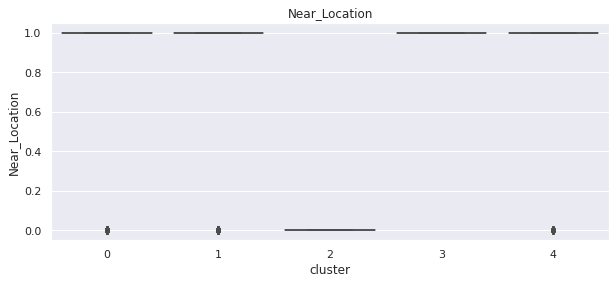

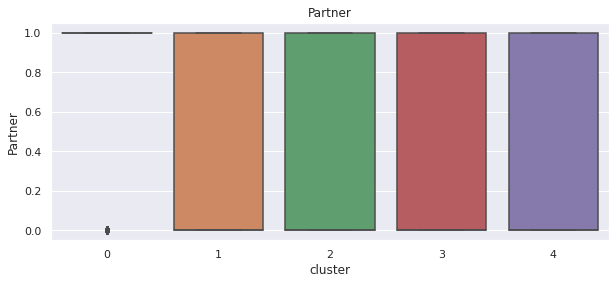

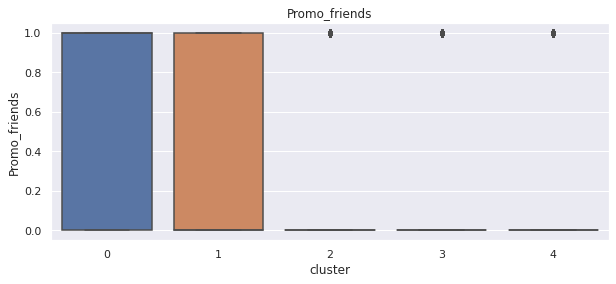

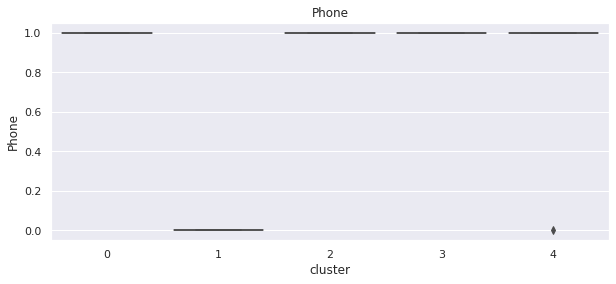

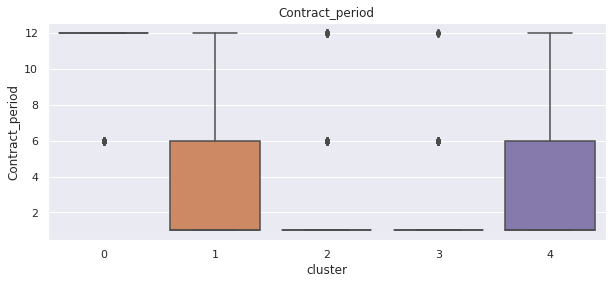

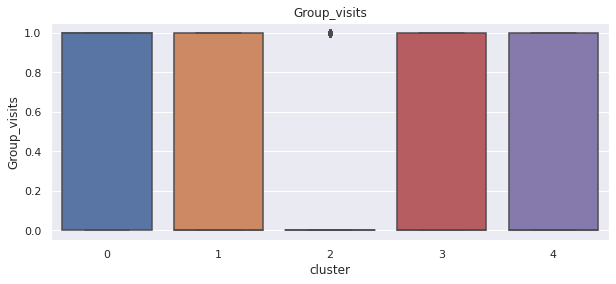

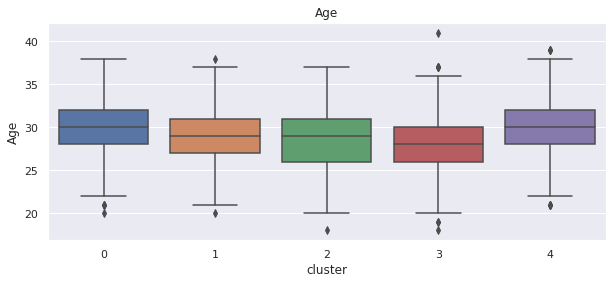

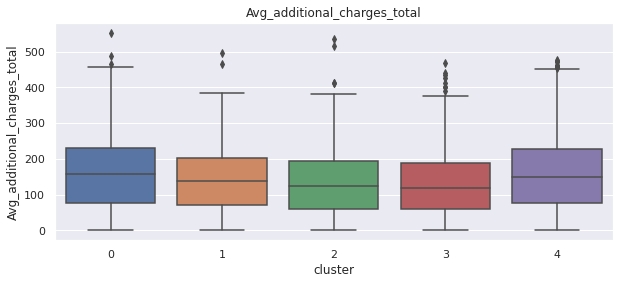

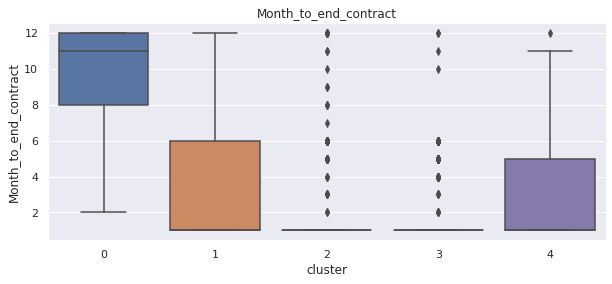

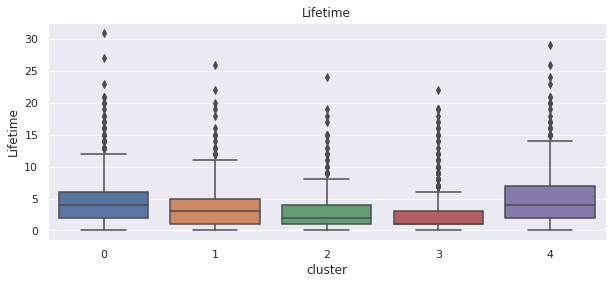

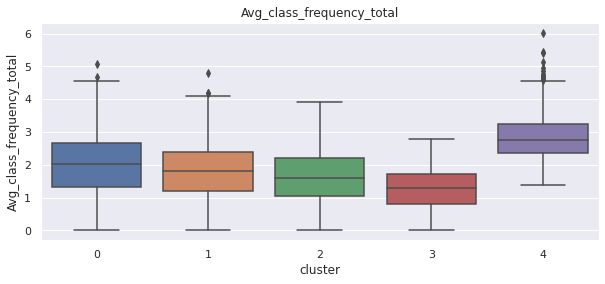

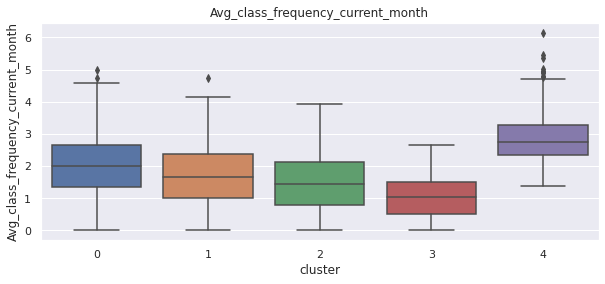

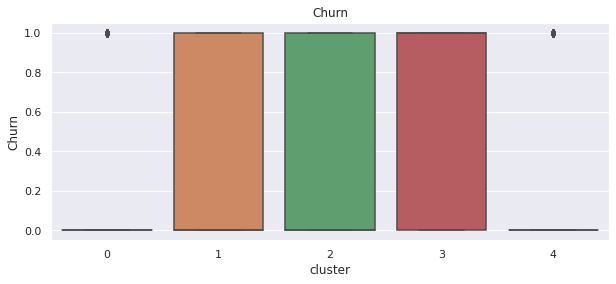

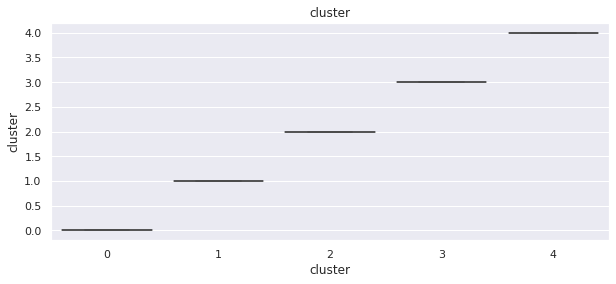

In [17]:
#построим графики распределения для признаков по каждому кластеру
 
for col in df.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df, x='cluster', y=col)
    plt.title(col)
    plt.show()

Итак, подробнее посмотрим на каждый кластер.
Кластер 1. В нем есть как мужчины так и женщины. Большинство живут рядом с фитнес-центром. Большинство клиентов этого кластера - сотрудники предприятий-партнеров. Длительность действующего абонемента стремится к 12 месяцам. Средний возраст - около 30 лет. В этом кластере довольно большая выручка от других услуг центра, доходит до 500 у.е.До окончания действующего абонемента еще довольно далеко - в среднем 11 месяцев.
Кластер 2.  В нем есть как мужчины так и женщины. Большинство живут рядом с фитнес-центром. У представителей этого кластера в базу не забит телефон. Длительность действующего абонемента от 0 до 6 месяцев, но есть и более длительные. Средний возраст - около 29 лет. До окончания действующего абонемента от 1 до 5 месяцев, но есть и более поздние даты.
Кластер 3.  В нем есть как мужчины так и женщины. Большинство живут далеко от фитнес-центра. Абонемент приобретали в основном на 1 месяц. Представители этого кластера избегают групповых занятий. 
Кластер 4.  В нем есть как мужчины так и женщины. Большинство живут рядом с центром. Абонемент приобретали в основном на 1 месяц. Средний возраст 28 лет. В эту группу входят относительно новые клиенты, с момента первого обращения которых в среднем прошло около 3-4 месяцев.
Кластер 5. В нем есть как мужчины так и женщины. Большинство живут рядом с фитнес-центром. Большинство клиентов этого кластера - сотрудники предприятий-партнеров.  Длительность действующего абонемента от 0 до 6 месяцев, но есть и более длительные. Средний возраст - около 30 лет. 

In [18]:
df.groupby(['cluster'])['Churn'].mean()

cluster
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: Churn, dtype: float64

Наш вывод подтвердился - первый кластер самый надежный. И это не удивительно, в него входят клиенты, купившие абонемент на год. И они будут его вырабатывать, они в течение года никуда не уйдут. А клиенты, входящие в 4 кластер, а это клиенты, реже других посещающих фитнес-центр, не особо заинтересованы в фитнесе, и доля оттока у них самая высокая.

## Основные выводы

1. Портрет клиента: мужчин и женщин практически поровну, большинство клиентов (более 80%) живут рядом с фитнес-центром, работников предприятий-партнеров и не относящихся к таковым практически равное количество. Большинство клиентов посещают групповые занятия (почти 60%). Около 70% клиентов использовали промо-код от знакомого при оплате первого абонемента.
2. Сотрудников компаний-партнеров, клиентов, пришедших по акции "приведи друга", клиентов, посещающих групповые занятия, больше среди оставшихся клиентов. Средний возраст ушедших клиентов около 27 лет, оставшихся - около 30. Вполне логично, что длительность абонемента у оставшихся клиентов составляет около 6 месяцев, у ушедших - около двух. Оставшиеся клиенты чаще, чем ушедшие, пользуются дополнительными услугами фитнес-центра (признак Avg_additional_charges_total). Довольно отличается время с момента первого посещения центра: более 5 месяцев у оставшихся клиентов и неполные 2 месяца - у ушедших. "Преданные" клиенты посещают фитнес не менее 2 раз в неделю, ушедшие - около одного.
3.Таким образом, наиболее важными признаками оказались: Lifetime (время с момента первого обращения в центр), Avg_class_frequency_current_month (частота посещений в неделю), Avg_class_frequency_total (частота посещений в неделю за предыдущий месяц), Age (Возраст), Avg_additional_charges_total (выручка от других услуг фитнес-центра), Month_to_end_contract(срок до окончания абонемента) и Contract_period(длительность действующего абонемента).
4. Первый кластер самый надежный. И это не удивительно, в него входят клиенты, купившие абонемент на год. И они будут его вырабатывать, они в течение года никуда не уйдут. А клиенты, входящие в 4 кластер, а это клиенты, реже других посещающих фитнес-центр, не особо заинтересованы в фитнесе, и доля оттока у них самая высокая.

Основные рекомендации:
1. Наиболее надежные клиенты - те, которые купили абонемент на год. Поэтому необходимо стимулировать клиентов на покупку длительного абонемента. Можно, например, делать скидку, либо небольшие подарки.
2. Также анализ показал, что наиболее надежные клиенты - те, которые занимаются более двух раз в неделю. Поэтому необходима мотивация для клиентов заниматься чаще. Например, предложить клиентам, которые посещают индивидуальные занятия 2 и более раз в неделю, бесплатное групповое занятие.
3. Клиентов, у которых подходит к концу их абонемент, необходимо стимулировать на продление. Это может быть бесплатное групповое занятие, бесплатный кофе в кафе фитнес-центра и т.д.